In [37]:
# Jhaveri Aditya Alok - 2018A7PS0209H
# Vaishnavee Nautiyal - 2018A7PS0286H
# Aryesh Koya - 2018A4PS0637H

In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [39]:
from google.colab import drive 
drive.mount('/content/drive', force_remount = 'True')

Mounted at /content/drive


In [40]:
data = pd.read_csv('/content/drive/MyDrive/MachineLearning/LDA/dataset_FLD.csv')
print(data)

          PC1       PC2       PC3  Target
0   -6.672418 -1.206198 -1.081050       0
1    1.675598  0.614994 -0.971600       0
2   -4.039058  0.335102  0.544618       1
3    0.793526 -0.235277  0.551771       1
4    3.820273 -0.274691  0.454743       1
..        ...       ...       ...     ...
995 -3.680139  0.966962 -0.904337       0
996 -4.063900  0.802611  1.023708       1
997 -0.814430 -0.693945  0.876776       1
998 -0.325122 -0.759024  1.299772       1
999 -1.503431 -0.269458 -1.124390       0

[1000 rows x 4 columns]


In [41]:
def Findw0(mean1, mean2, std1, std2):
  w = 1/(2*std1**2) - 1/(2*std2**2)
  x = mean2/(std2**2) - mean1/(std1**2)
  y = mean1**2/(2*std1**2) - mean2**2/(2*std2**2) - np.log(std2/std1)
  z = np.roots([w, x, y])
  returnValue = 0
  for a in z:
    if mean2 < a and a < mean1:
      r = a

  return returnValue

In [42]:
def LDA(data):

  class1 = data[data.iloc[:, 3] == 1]
  class1 = class1.iloc[:, [0,1,2] ]
  mean1 = class1.mean(axis=0)
  sub1 = class1 - mean1
  class2 = data[data.iloc[:, 3] == 0]
  class2 = class2.iloc[:, [0, 1, 2]]
  mean2 = class2.mean(axis=0)
  sub2 = class2 - mean2
  mean = mean2 - mean1

  print(mean)

  SM1 = np.dot(np.transpose(sub1), sub1)
  print("Scattered Matrix 1: ", SM1)

  SM2 = np.dot(np.transpose(sub2), sub2)
  print("Scattered Matrix 2: ", SM2)

  SW = np.add(SM1, SM2)
  print("SW matrix is: ", SW)

  SW_INV = np.linalg.inv(SW)
  print("SW Inverse: ", SW_INV)

  W = np.dot(SW_INV, mean1 - mean2)
  print("W vector: ", W)

  projectionClass1 = np.dot(W, np.transpose(class1))
  projectionClass2 = np.dot(W, np.transpose(class2))

  average1 = projectionClass1.mean()
  average2 = projectionClass2.mean()
  std1 = projectionClass1.std()
  std2 = projectionClass2.std()

  x_all = np.arange(-0.05, 0.05, 0.001)
  y1 = norm.pdf(x_all, average1, std1)
  y2 = norm.pdf(x_all, average2, std2)

  result = Findw0(average1, average2, std1, std2)
  print("Deterministic value: ", result)

  truePositive, falseNegative, falsePositive, trueNegative = 0, 0, 0, 0

  for i in projectionClass2:
    if i < result:
      truePositive = truePositive + 1
    else: 
      falseNegative = falseNegative+1

  for i in projectionClass1:
    if i > result:
      trueNegative = trueNegative + 1
    else:
      falsePositive = falsePositive + 1
    
  listOfClass = [truePositive, falseNegative, falsePositive, trueNegative]
  acc = (trueNegative + truePositive)/len(data)

  print('The accuracy of the FLD in classifying is: ', acc*100, '\n')


  plt.figure(4)


  plt.plot(x_all, y2, c='blue', label='Class 0')
  plt.hist(projectionClass2, bins = 12, color='#718ed1')
  plt.xlabel("Projection Line", fontsize="12")
  plt.ylabel("Density of points", fontsize="12")
  plt.xlim(-0.1, 0.1)
  plt.ylim(0, 150)
  plt.legend()
  plt.show()

  plt.figure(3)


  plt.plot(x_all, y1, c='r', label="Class 1")
  plt.hist(projectionClass1, bins=25, color="#c28080")
  plt.xlabel("Projection line", fontsize="12")
  plt.ylabel("Density of points", fontsize="12")
  plt.xlim(-0.1, 0.1)
  plt.ylim(0, 150)
  plt.legend()
  plt.show()

  plt.figure(2)

  plt.plot(x_all, y2, c='blue', label='Class 0')
  plt.hist(projectionClass2, bins = 12, color='#718ed1')

  plt.plot(x_all, y1, c='r', label="Class 1")
  plt.hist(projectionClass1, bins=25, color="#c28080")

  plt.xlabel("Projection line", fontsize="12")
  plt.ylabel("Density of points", fontsize="12")
  yPoints = np.linspace(-0.03, 0.03, 1000)
  xPoints = result*np.ones((1000))

  plt.plot(xPoints, yPoints*1000, '--')
  plt.xlim(-0.1, 0.1)
  plt.ylim(0,150)
  plt.legend()
  plt.show()

  # Plotting the projected points

  plt.figure(1)

  yPoints=0*projectionClass1
  plt.scatter(projectionClass1, yPoints, c='r', label="Class 1")
  yPoints = 0*projectionClass2
  plt.scatter(projectionClass2, yPoints, c='blue', label="Class 0")
  yPoints=np.linspace(-0.03, 0.03, 1000)
  xPoints= result*np.ones((1000))
  plt.plot(xPoints, yPoints*1000, '--')
  plt.xlim(-0.1, 0.1)
  plt.ylim(-0.02, 0.02)

  pdf1 = norm.pdf(class1, average1, std1)

  pdf2 = norm.pdf(class2, average2, std2)

  plt.figure(5)
  a = np.reshape(listOfClass, (2,2))
  # plt.imshow(a, cmap='hot', interpolation='nearest')
  ax = sns.heatmap(a, linewidth=0.5)

  plt.show()

  return W, result

In [43]:
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
def Visualise3D(data):
  x = data.iloc[:, 0]
  y = data.iloc[:, 1]
  z = data.iloc[:, 2]

  fig = plt.figure()
  ax = fig.add_subplot(111, projection = '3d')

  ax.scatter(x, y, z, c=data.iloc[:, 3], cmap="coolwarm")
  ax.set_xlabel("PC1")
  ax.set_ylabel("PC2")
  ax.set_zlabel("PC3")
  ax.set_xlim(-10, 10)
  ax.set_ylim(-3, 3)
  ax.set_zlim(-2, 2)

  plt.show()

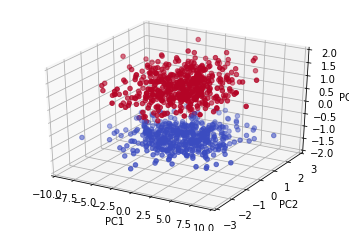

In [44]:
Visualise3D(data)

PC1   -0.120808
PC2    0.100812
PC3   -2.015401
dtype: float64
Scattered Matrix 1:  [[4213.75649592    4.75321826   62.90465755]
 [   4.75321826  495.31648963   13.43656478]
 [  62.90465755   13.43656478   76.97468242]]
Scattered Matrix 2:  [[ 4.84762093e+03 -1.03353986e+02  5.91405263e-02]
 [-1.03353986e+02  4.90885070e+02 -5.47697620e-01]
 [ 5.91405263e-02 -5.47697620e-01  1.27090501e+01]]
SW matrix is:  [[9061.37742888  -98.60076737   62.96379808]
 [ -98.60076737  986.20155992   12.88886716]
 [  62.96379808   12.88886716   89.68373253]]
SW Inverse:  [[ 1.11044484e-04  1.21439550e-05 -7.97056953e-05]
 [ 1.21439550e-05  1.01722768e-03 -1.54716374e-04]
 [-7.97056953e-05 -1.54716374e-04  1.12284878e-02]]
W vector:  [-0.00014845 -0.0004129   0.02263587]
Deterministic value:  0
The accuracy of the FLD in classifying is:  99.7 



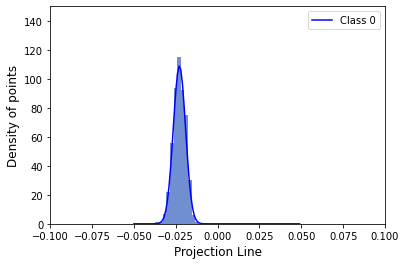

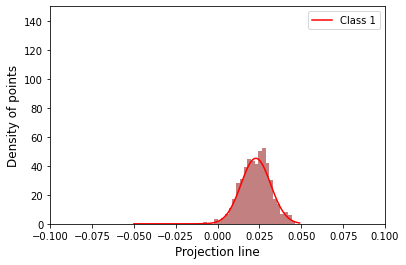

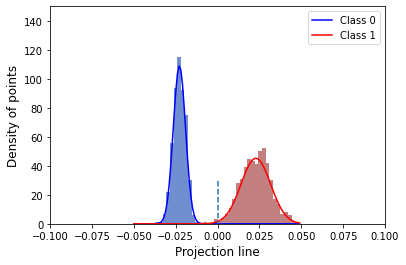

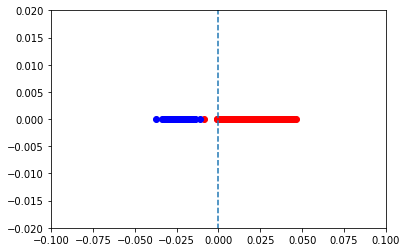

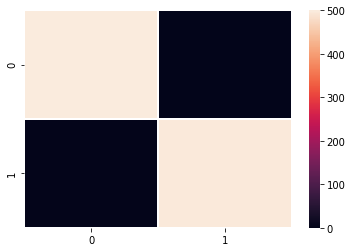

In [45]:
W, result = LDA(data)

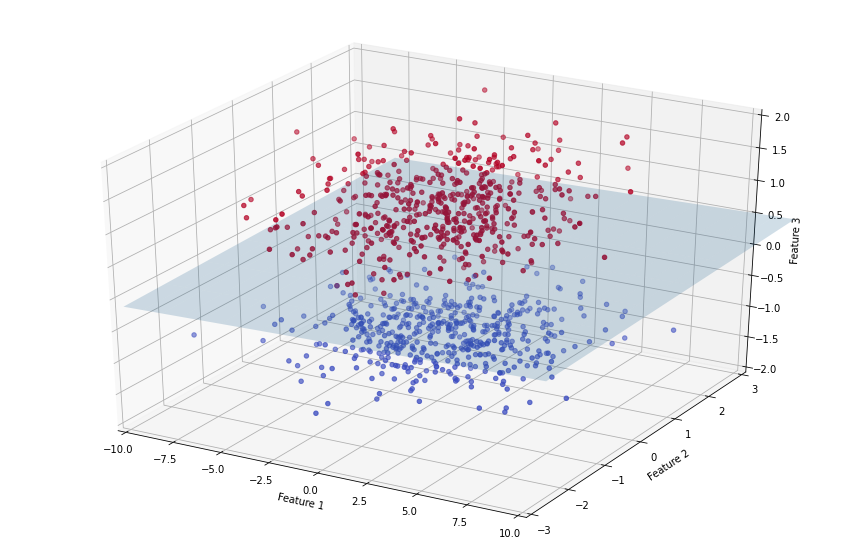

In [46]:
normal = W
res = result

f1 = data.iloc[:, 0]
f2 = data.iloc[:, 1]
f3 = data.iloc[:, 2]

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(f1, f2, f3, c=data.iloc[:, 3], cmap="coolwarm")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_xlim(-10, 10)
ax.set_ylim(-3, 3)
ax.set_zlim(-2, 2)

# Creating X and Y
X, Y = np.meshgrid(range(-10, 12), range(-3, 5))
# Calculating corresponding Z coord
Z = (-normal[0]*X - normal[1]*Y - res)*1./normal[2]

# Plot the surface
ax.plot_surface(X, Y, Z, alpha=0.2)
plt.show()